***Load and explore data ***

**1. Import the required libraries and read the dataset.**

**2. Check the first few samples, shape, info of the data and try to familiarise yourself with different features**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df.shape

(18207, 60)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

Data has 18207 rows and 60 columns in it.

Data type is float, object and int.

Data requires cleaning and also needs to drop columns like
Photo,Flag,Club Logo and Jersey Number

**3. Drop the columns which you think redundant for the analysis.[Hint: columns like 'Photo','Flag','Club Logo']**

In [5]:
# dropping the below
df= df.drop(['Photo','Flag','Club Logo','Jersey Number'], axis=1)

In [6]:
#after dropping the clumns
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
df.shape

(18207, 56)

**Data Cleaning and Preprocessing**

4**. Convert the columns "Value", "Wage", "Release Clause" to float datatype after getting rid of currency symbol and suffix.  - Note: When the record/entry has "M"(indicates millions) as suffix you need to multiply that value with 1000000 - When the record/entry has "K"(indicates thousands) as suffix you need to multiply that value with 1**000

In [44]:
## Writing a function to clean the data of columns "Value" and "Wage"
def convert(entry):

    if entry==np.nan:
        new_entry=float(0)
    else:
        entry=entry.replace('€','')
        if entry[-1]=='K':
            new_entry=float(entry.replace('K',''))*1000
        else:
            new_entry=float(entry.replace('M',''))*1000000
    return new_entry

In [45]:
## applying the above function to column 'Value'
df['Value']= df['Value'].apply(lambda x : convert(x))

## applying the above function to column 'Wage'
df['Wage'] = df['Wage'].apply(lambda x: convert(x))

## applying the above function to column 'Release Clause'
df['Release Clause'] = df['Release Clause'].fillna('0').apply(lambda x: convert(x))

In [46]:
## Just checking some samples after cleaning the data.
df[['Value','Wage','Release Clause']].sample(4)

,Value,Wage,Release Clause
11219,5.750000e+11,1.000000e+09,8.340000e+11
11030,8.750000e+11,2.000000e+09,1.900000e+12
4230,2.400000e+12,1.300000e+10,4.700000e+12
4337,2.700000e+12,2.600000e+10,5.400000e+12


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      18207 non-null  object        
 7   Value                     18207 non-null  float64       
 8   Wage                      18207 non-null  float64       
 9   Preferred Foot            18207 non-null  object        
 10  International Reputation  18207 non-null  float64       
 11  Weak Foot                 18207 non-null  float64       
 12  Skill Moves       

In [13]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


***5. Convert the column "Joined" into integer data type with keeping only the year. ***

In [14]:
## just checking some samples
df['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [ ]:
## Keeping only year from the column 'Joined'
## Filling null by 0 and converting it to integer
df['Joined'] = df['Joined'].str.split().str.get(2).fillna(0).astype(int)

In [18]:
df['Joined'].head()

0    2004
1    2018
2    2017
3    2011
4    2015
Name: Joined, dtype: int64

***6. Convert the column "Contract Valid Until" to pandas datetime type. ***

In [19]:
## Will check for the unique point first
df['Contract Valid Until'].unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', 'Jun 30, 2019',
       '2025', '2026', 'Dec 31, 2018', '2018', nan, 'May 31, 2020',
       'Jun 30, 2020', 'May 31, 2019', 'Dec 31, 2019', 'Jan 1, 2019',
       'Jun 1, 2019', 'Jan 4, 2019', 'Jan 31, 2019', 'Jan 7, 2019',
       'Jan 2, 2019', 'Jan 6, 2019', 'Oct 14, 2019', 'Jan 3, 2019',
       'May 4, 2019', 'Jan 12, 2019', 'Jan 25, 2019', 'Jan 18, 2019',
       'Dec 1, 2019', 'Nov 30, 2018', 'Feb 27, 2020', 'Jan 5, 2019',
       'Jan 15, 2019', 'Jan 30, 2019', 'Jan 11, 2019', 'Jan 20, 2019'],
      dtype=object)

In [20]:
## converting into pandas datetime format.
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [21]:
## Contract valid until column after conversion.
df['Contract Valid Until'].sample(5)

11841   2021-01-01
15911   2019-01-01
7344    2019-01-01
10963   2021-01-01
5770    2020-01-01
Name: Contract Valid Until, dtype: datetime64[ns]

***7. The column 'Height' is in inches with a quotation mark, Convert to float with decimal points. ***

In [22]:
df['Height'].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [23]:
## writing a function
def height_convert(x):
    if x is not None:
        return float(str(x).replace("'",'.'))

In [24]:
## applying a function
df['Height'] = df['Height'].apply(height_convert)

In [25]:
df['Height'].head()

0    5.70
1    6.20
2    5.90
3    6.40
4    5.11
Name: Height, dtype: float64

***8. The column "Weight" has the suffix as lbs, remove the suffix and convert to float. ***

In [26]:
df['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [27]:
#replacing LBS to float using lambda function
df['Weight'] = df['Weight'].fillna('0').apply(lambda x: x.replace('lbs','')).astype(float)

In [28]:
#LBS replaced with float data type
df['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

***9. Check for the percentage of missing values and impute them with appropriate imputation techniques.***

In [29]:
df.isnull().sum()/len(df)*100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Joined                       0.000000
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.000000
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys                      0.263635
Dribbling   

As observed that missing values are present on almost all columns but "Loaned from" showing 93% of values as missing, therefore it is appropriate drop that column first.

In [30]:
#dropping Loaned from column
df.drop('Loaned From',axis=1,inplace=True)

as missing values are present in both categorical and numerical columns, will have separate columns and create functions.

will impute numerical values with median and categorical with mode.

In [31]:

missing_values = df.isnull().sum()/len(df)

index = [i  for i in missing_values[missing_values>0].index]

## separating numerical columns and categorical columns
numerical_columns = [i     for i in index      if i in df.columns and  df[i].dtype!=object]
categorical_columns = [i     for i in index      if i in df.columns and  df[i].dtype==object]

## Filling the null values of the numerical columns with median computation.
for columns in numerical_columns:
    df[columns]=df[columns].fillna(df[columns].median())

## Filling the null values of the categorical columns with mode computation.
for columns in categorical_columns:
    df[columns]=df[columns].fillna(df[columns].mode()[0])

In [32]:
#checking null values after imputing
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions 

**Data now looks clean and good to go for Exploratory Analysis **

**EDA**

**10. Plot the distribution of Overall rating for all the players and write your findings**

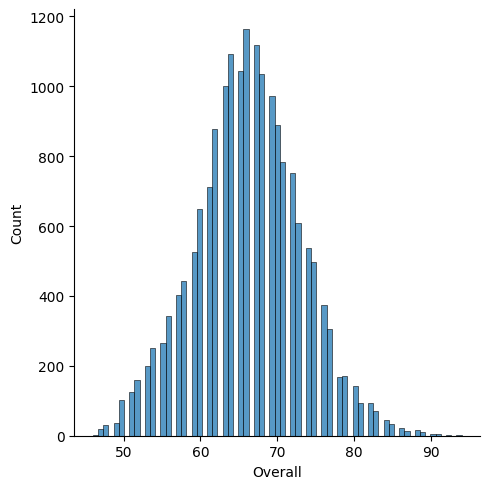

In [36]:
sns.displot(df['Overall'])
plt.show()

The overall rating is between 50 to 85 majorly and highest
being between 65 to 75.



***11. Retrieve the names of top20 players based on the Overall rating. ***

In [37]:
#Will use groupby function to get the top 20 highest rated players and sort them in ascending order.
top20_players = df.groupby('Name')['Overall'].max().sort_values(ascending=False).head(20)
top20_players

Name
Cristiano Ronaldo    94
L. Messi             94
Neymar Jr            92
Sergio Ramos         91
E. Hazard            91
De Gea               91
L. Suárez            91
L. Modrić            91
K. De Bruyne         91
D. Godín             90
David Silva          90
T. Kroos             90
J. Oblak             90
R. Lewandowski       90
H. Kane              89
T. Courtois          89
S. Agüero            89
M. ter Stegen        89
Sergio Busquets      89
E. Cavani            89
Name: Overall, dtype: int64

**12. Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating**.  

In [49]:
Top20_df = df[ (df['Name'].isin(top20_players.index)) & (df['Overall'].isin(top20_players.values)) ]
Top20_df.head(20)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,1.105000e+14,5.650000e+11,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.265000e+14
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7.700000e+13,4.050000e+11,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.271000e+14
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,1.185000e+14,2.900000e+11,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.281000e+14
3,193080,De Gea,27,Spain,91,93,Manchester United,7.200000e+13,2.600000e+11,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.386000e+14
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,1.020000e+14,3.550000e+11,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1.964000e+14
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,9.300000e+13,3.400000e+11,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,1.721000e+14
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,6.700000e+13,4.200000e+11,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,1.374000e+14
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,8.000000e+13,4.550000e+11,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,1.640000e+14
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,5.100000e+13,3.800000e+11,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,1.046000e+14
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,6.800000e+13,9.400000e+10,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,1.445000e+14


**13. What is the average "Age" and "Wage" of these top 20 players? (use the data frame created in the question 11)**

In [50]:
#Top20_df[['Age','Wage']].mean()
Top20_df['Age'].mean()

28.9

In [51]:
Top20_df['Wage'].mean()
#Top20_df.info()

301700000000.0

**14. Among the top 20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage.**

In [52]:
Top20_df[Top20_df['Wage']==Top20_df['Wage'].max()][['Name','Wage']]

,Name,Wage
0,L. Messi,5.650000e+11


**15. Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'.

( - i) find the average Overall rating for each club.

(- ii) Display the average overall rating of Top10 Clubs using a plot .**

In [53]:
#will create and new dataframe to include top players based on name, club name, Wage and Overall ratting.
df_PCWO = df[['Name','Club','Wage','Overall']]
df_PCWO.head(10)

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,5.650000e+11,94
1,Cristiano Ronaldo,Juventus,4.050000e+11,94
2,Neymar Jr,Paris Saint-Germain,2.900000e+11,92
3,De Gea,Manchester United,2.600000e+11,91
4,K. De Bruyne,Manchester City,3.550000e+11,91
5,E. Hazard,Chelsea,3.400000e+11,91
6,L. Modrić,Real Madrid,4.200000e+11,91
7,L. Suárez,FC Barcelona,4.550000e+11,91
8,Sergio Ramos,Real Madrid,3.800000e+11,91
9,J. Oblak,Atlético Madrid,9.400000e+10,90


In [54]:
## Finding the average overall rating for each club
df_PCWO.groupby('Club')['Overall'].mean()

Club
 SSV Jahn Regensburg     65.586207
1. FC Heidenheim 1846    65.750000
1. FC Kaiserslautern     63.384615
1. FC Köln               70.785714
1. FC Magdeburg          65.615385
                           ...    
Zagłębie Sosnowiec       60.760000
Çaykur Rizespor          66.900000
Örebro SK                60.481481
Östersunds FK            63.545455
Śląsk Wrocław            62.200000
Name: Overall, Length: 651, dtype: float64

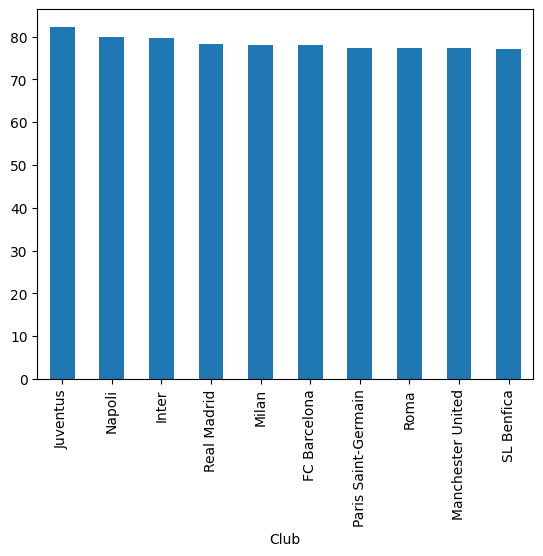

In [55]:
## Displaying the average overall rating of Top10 Clubs using a bar plot
df_PCWO.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

***16. What is the relationship between age and individual potential of the player? Visualise the relationship with appropriate plot and Comment on the same. ***

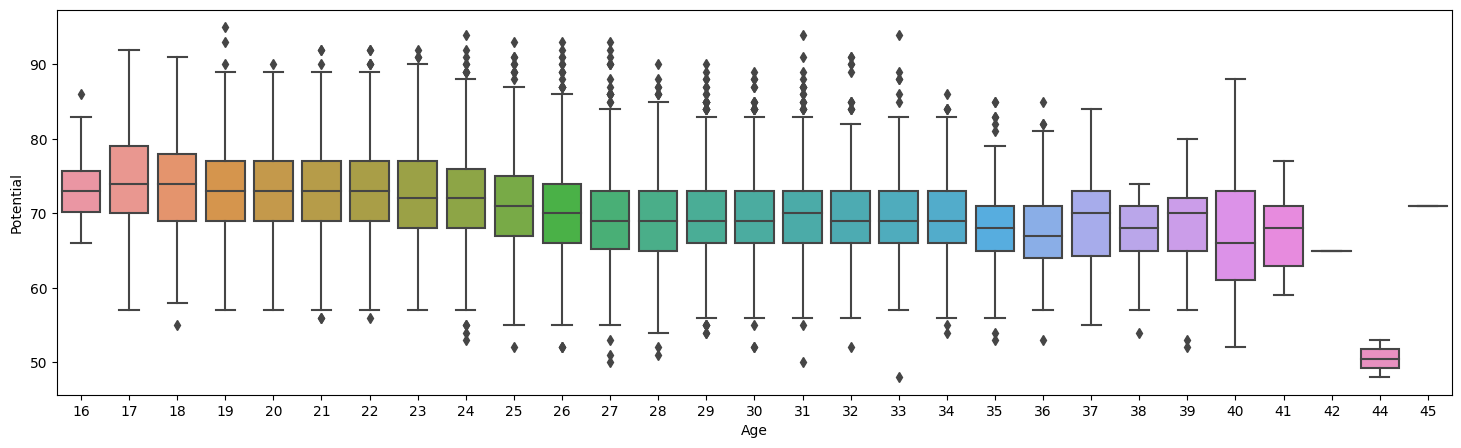

In [60]:
plt.figure(figsize=(18,5))
sns.boxplot(data=df, x="Age", y="Potential")
plt.show()

We can observe that the Age does impoact the Potential of the player as it grow old.

highest potential seen at the age of 17 with maximum potential around the age of 19. which can be seen as an outlier in the boxplot.

The potential seems to be constant till age 34 and it start to decline post that.

There are also a lot of outliers which indicates that despite being of higher ager, the player shows higher potential which is an exception for some cases.

***17. Which features directly contribute to the wages of the players? Support your answer with a plot and a metric.  (hint: use potential, Overall, value, international reputation, and Release Clause) ***

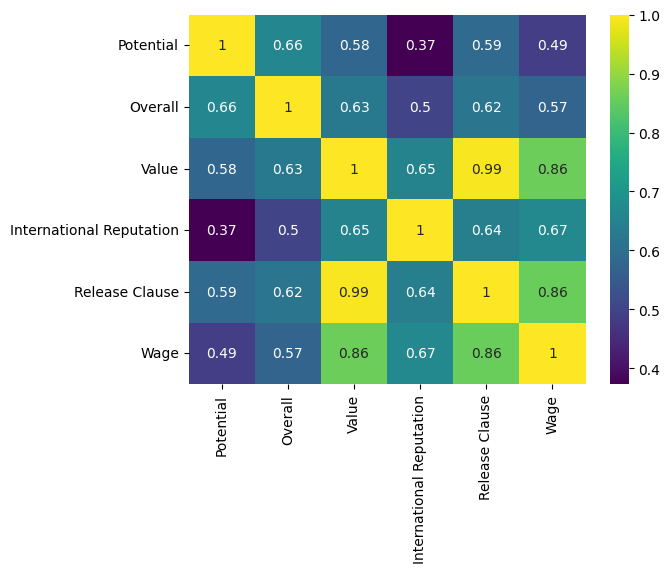

In [63]:
key_features = df[['Potential','Overall','Value','International Reputation','Release Clause','Wage', ]]

sns.heatmap(key_features.corr(),annot=True,cmap='viridis')
plt.show()

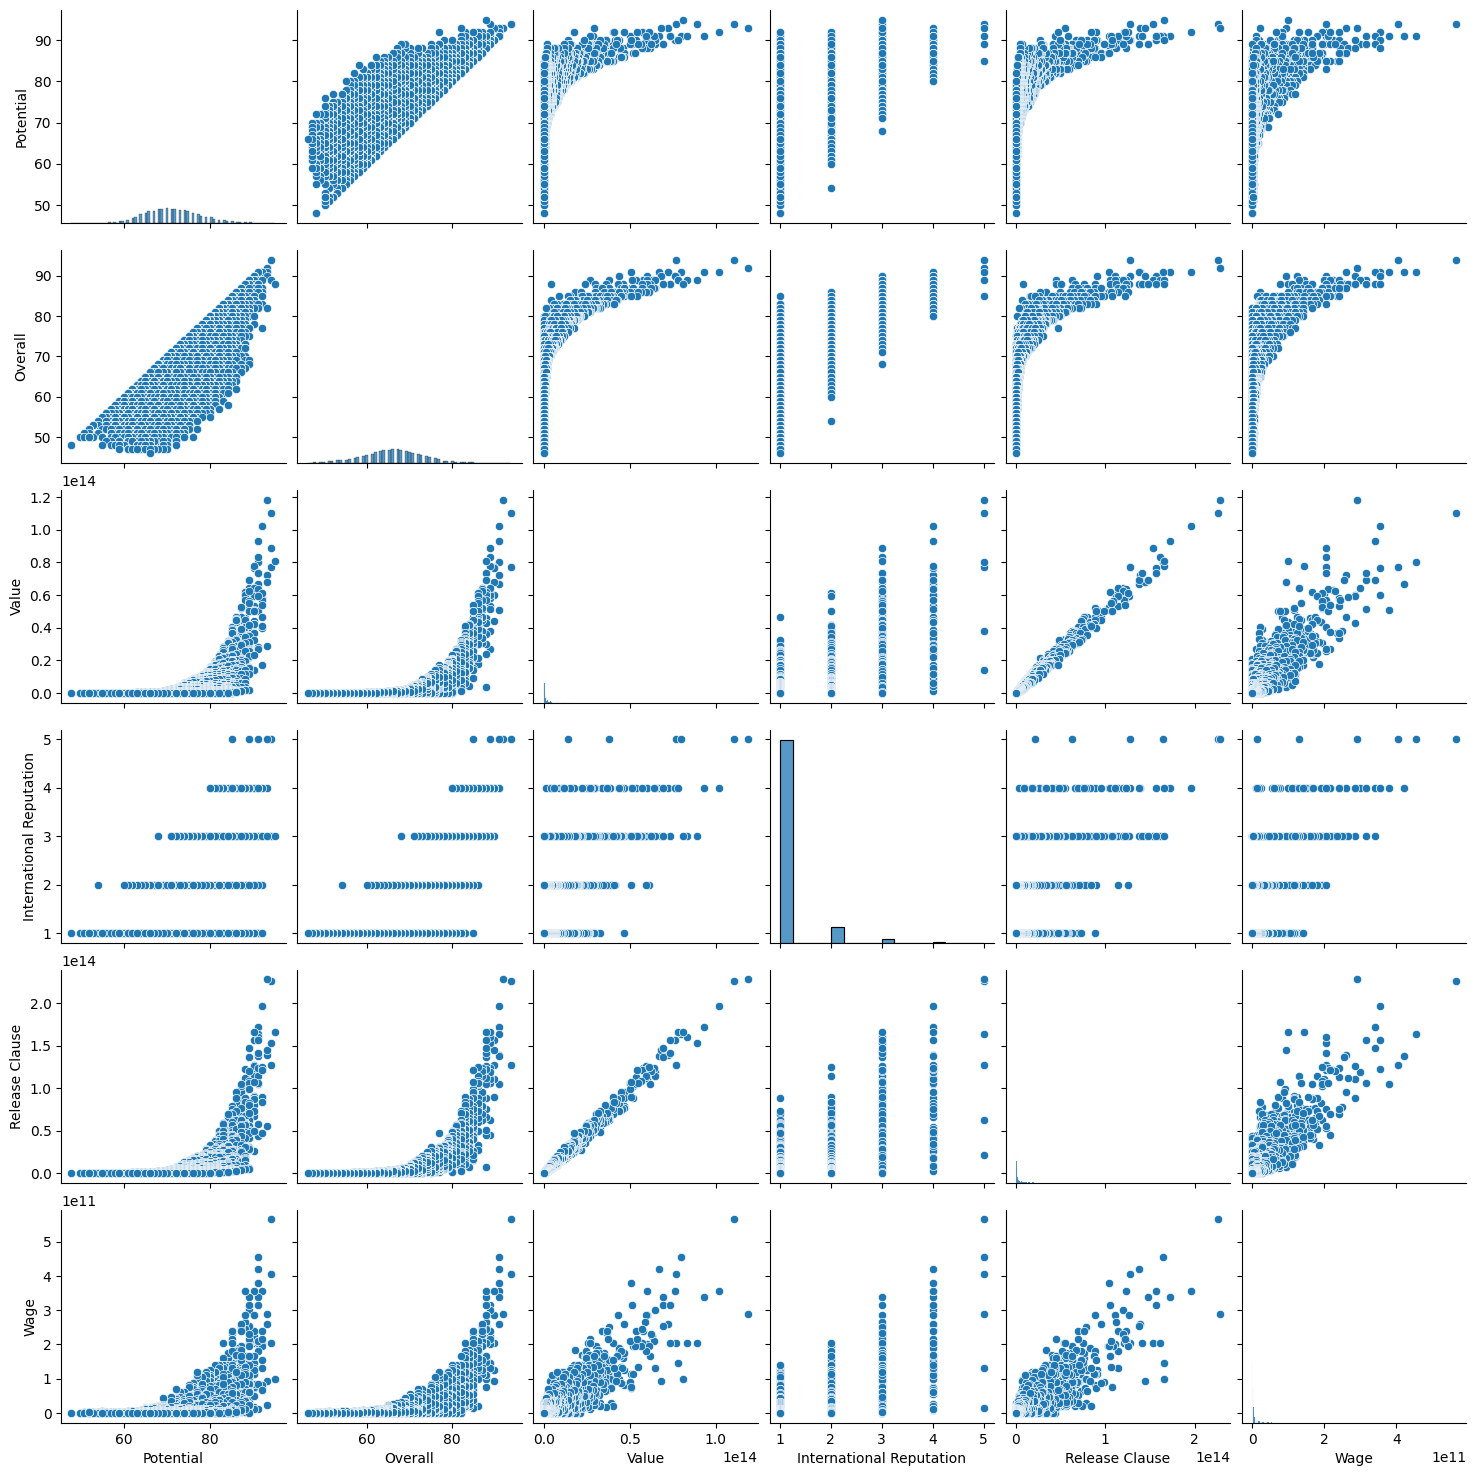

In [64]:
sns.pairplot(key_features)
plt.show()

The heatmap and pairplot above indicate that The Wage column has highest positive correlation with the columns potential , Overall, Value, International reputation, and Release Clause.

The pairplot also suggest that when the potentional, overall, value, international reputation, and Release cause increases there is a significant increase in the wages of the players.

**18. Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Display it using a plot.**

In [65]:
df['Position'].value_counts().sort_values(ascending=False).head()

ST    2212
GK    2025
CB    1778
CM    1394
LB    1322
Name: Position, dtype: int64

In [66]:
df['Position'].value_counts().sort_values(ascending=True).head()

LF     15
RF     16
RAM    21
LAM    21
CF     74
Name: Position, dtype: int64

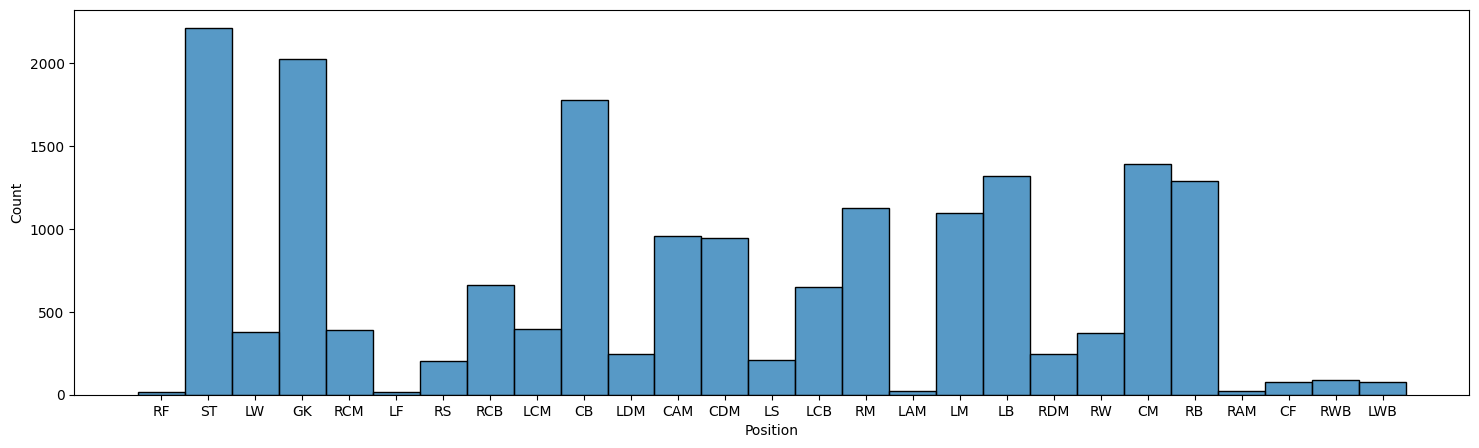

In [67]:
plt.figure(figsize=(18,5))
sns.histplot(df['Position'])
plt.show()

As showing above the highest numners of player play in position
 of 'ST' (striker).

The least numbers of player play in the position 'LF' (Left Forward).

***19. How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players. ***

In [68]:
df[(df['Club']=='Juventus') & (df['Wage']>200000)]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7.700000e+13,4.050000e+11,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1.271000e+14
15,211110,P. Dybala,24,Argentina,89,94,Juventus,8.900000e+13,2.050000e+11,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,1.535000e+14
24,138956,G. Chiellini,33,Italy,89,89,Juventus,2.700000e+13,2.150000e+11,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,4.460000e+13
64,191043,Alex Sandro,27,Brazil,86,86,Juventus,3.650000e+13,1.600000e+11,Left,...,82.0,81.0,84.0,84.0,7.0,7.0,9.0,12.0,5.0,6.020000e+13
65,190483,Douglas Costa,27,Brazil,86,86,Juventus,4.650000e+13,1.750000e+11,Left,...,84.0,45.0,38.0,34.0,13.0,15.0,9.0,12.0,5.0,7.670000e+13
70,184344,L. Bonucci,31,Italy,86,86,Juventus,3.000000e+13,1.600000e+11,Right,...,86.0,90.0,86.0,80.0,2.0,2.0,3.0,2.0,4.0,4.950000e+13
72,180206,M. Pjanić,28,Bosnia Herzegovina,86,86,Juventus,4.400000e+13,1.800000e+11,Right,...,86.0,75.0,74.0,70.0,7.0,7.0,13.0,7.0,8.0,7.260000e+13
73,177509,M. Benatia,31,Morocco,86,86,Juventus,3.000000e+13,1.600000e+11,Right,...,82.0,89.0,87.0,85.0,7.0,4.0,8.0,7.0,11.0,4.950000e+13
92,186153,W. Szczęsny,28,Poland,85,87,Juventus,3.200000e+13,1.250000e+11,Right,...,65.0,20.0,13.0,12.0,85.0,81.0,71.0,85.0,87.0,5.520000e+13
99,179846,S. Khedira,31,Germany,85,85,Juventus,3.300000e+13,1.600000e+11,Right,...,84.0,80.0,83.0,76.0,11.0,9.0,5.0,15.0,8.0,5.450000e+13


There are 3 players the club 'Juventus' and their wage is greater than 200K

***20. Generate a data frame containing top 5 players by Overall rating for each unique position. ***


In [69]:
#using groupby function for Postion and apply Lambda function to sort vaules and displying it in ascending order.
top_5 = df.groupby(['Position']).apply(lambda x : x.sort_values('Overall',ascending=False).head(5))
top_5.head(10)

ID             Name  Age Nationality  Overall  Potential  \
Position                                                                     
CAM      17   194765     A. Griezmann   27      France       89         90   
         31   190460       C. Eriksen   26     Denmark       88         91   
         61   201942  Roberto Firmino   26      Brazil       86         87   
         66   189596        T. Müller   28     Germany       86         86   
         74   176635          M. Özil   29     Germany       86         86   
CB       12   182493         D. Godín   32     Uruguay       90         90   
         42   205600        S. Umtiti   24      France       87         92   
         73   177509       M. Benatia   31     Morocco       86         86   
         89   192366      N. Otamendi   30   Argentina       85         85   
         102  171919            Naldo   35      Brazil       85         85   

                           Club         Value          Wage Preferred Foot  \
Position                                                                     
CAM      17     Atlético Madrid  7.800000e+13  1.450000e+11           Left   
         31   Tottenham Hotspur  7.350000e+13  2.050000e+11          Right   
         61           Liverpool  5.300000e+13  1.950000e+11          Right   
         66   FC Bayern München  4.500000e+13  1.350000e+11          Right   
         74             Arsenal  4.350000e+13  1.900000e+11           Left   
CB       12     Atlético Madrid  4.400000e+13  1.250000e+11          Right   
         42        FC Barcelona  5.700000e+13  2.050000e+11           Left   
         73            Juventus  3.000000e+13  1.600000e+11          Right   
         89     Manchester City  2.850000e+13  1.700000e+11          Right   
         102      FC Schalke 04  9.000000e+12  3.800000e+10          Right   

              ...  Composure  Marking  StandingTackle SlidingTackle GKDiving  \
Position      ...                                                              
CAM      17   ...       87.0     59.0            47.0          48.0     14.0   
         31   ...       88.0     59.0            57.0          22.0      9.0   
         61   ...       87.0     60.0            64.0          42.0      8.0   
         66   ...       83.0     44.0            41.0          44.0      6.0   
         74   ...       82.0     24.0            16.0          19.0      6.0   
CB       12   ...       82.0     90.0            89.0          89.0      6.0   
         42   ...       82.0     90.0            89.0          86.0     15.0   
         73   ...       82.0     89.0            87.0          85.0      7.0   
         89   ...       80.0     83.0            85.0          84.0     12.0   
         102  ...       84.0     86.0            88.0          85.0     14.0   

             GKHandling  GKKicking GKPositioning  GKReflexes  Release Clause  
Position                                                                      
CAM      17         8.0       14.0          13.0        14.0    1.658000e+14  
         31        14.0        7.0           7.0         6.0    1.415000e+14  
         61        11.0        9.0           6.0        10.0    1.047000e+14  
         66         7.0       11.0          14.0        14.0    7.430000e+13  
         74        14.0       10.0           6.0        14.0    8.270000e+13  
CB       12         8.0       15.0           5.0        15.0    9.020000e+13  
         42        10.0       14.0          12.0        15.0    1.211000e+14  
         73         4.0        8.0           7.0        11.0    4.950000e+13  
         89         5.0        8.0          11.0        12.0    5.270000e+13  
         102       10.0       14.0           8.0        14.0    1.530000e+13  

[10 rows x 55 columns]

***21. What is the average wage one can expect to pay for the top 5 players in every position? (use the data frame created in Q20) ***

In [70]:
top_5['Wage'].groupby('Position').mean()

Position
CAM    1.740000e+11
CB     1.396000e+11
CDM    2.170000e+11
CF     4.740000e+10
CM     1.306000e+11
GK     1.928000e+11
LAM    8.160000e+10
LB     1.772000e+11
LCB    1.620000e+11
LCM    1.844000e+11
LDM    1.266000e+11
LF     1.212000e+11
LM     1.646000e+11
LS     1.302000e+11
LW     2.610000e+11
LWB    3.420000e+10
RAM    4.540000e+10
RB     1.554000e+11
RCB    2.310000e+11
RCM    2.408000e+11
RDM    1.050000e+11
RF     1.480000e+11
RM     1.314000e+11
RS     1.322000e+11
RW     2.020000e+11
RWB    4.420000e+10
ST     2.940000e+11
Name: Wage, dtype: float64